In [308]:
import pandas as pd
import numpy as np
from ProgSnap2 import ProgSnap2Dataset
from ProgSnap2 import PS2
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import os
from os import path

In [309]:
#Snippet from "naive_model.ipynb". 
#Defining the path and semester
semester = 'F19'
BASE_PATH = os.path.join('C:/Users/Jesper/Google Drive/Uni docs/Statistik/Masterarbeit/Daten/csedm_challenge_dataset', 'F19_Release_Train_06-28-21')
TRAIN_PATH = os.path.join(BASE_PATH, 'Train')

## Preprecess Data

In [321]:
#Dataset for early Problem Performance (Aggregated from Event-Data)
early = pd.read_csv(os.path.join(TRAIN_PATH, 'early.csv'))
early["alt_Label"] = early.apply(lambda x: 1 if (x["CorrectEventually"] and x["Attempts"] <= 3) else 0, axis=1)
early

late = pd.read_csv(os.path.join(TRAIN_PATH, 'late.csv'))

### Subject Level DF

In [311]:
#Function from "naive_model.ipynb", extended by me
#Changed to use subject_id
def extract_instance_features(subject_id, early_df):
    instance = pd.DataFrame(data=[subject_id], columns=["SubjectID"])
    early_problems = early_df[early_df["SubjectID"] == subject_id]
    # Extract very naive features about the student
    # (without respect to the problem bring predicted)
    # Number of early problems attempted
    instance['ProblemsAttempted'] = early_problems.shape[0]
    # Percentage of early problems gotten correct eventually
    instance['PercCorrectEventually'] = np.mean(early_problems['CorrectEventually'])
    # Median attempts made on early problems
    instance['MedAttempts'] = np.median(early_problems['Attempts'])
    # Max attempts made on early problems
    instance['MaxAttempts'] = np.max(early_problems['Attempts'])
    # Percentage of problems gotten correct on the first try
    instance['PercCorrectFirstTry'] = np.mean(early_problems['Attempts'] == 1)
    #instance = instance.drop('SubjectID')
    instance['PercLabelledTrue'] = np.mean(early_problems["Label"] == 1)
    try:
        instance['PercAltLabelTrue'] = np.mean(early_problems["alt_Label"] == 1)
    except Exception:
        pass
    return instance


def make_subject_df(task_level_data):
    """Create a DataFrame that aggregates Task-Performance-Data on subject-level

    Args:
        task_level_data (pd.DataFrame): Task-Performance-Date aggregated from Event-Data. 
    """
    subjects = task_level_data["SubjectID"].unique()
    subject_df = pd.DataFrame(columns=["SubjectID", "ProblemsAttempted", "PercCorrectEventually", "MedAttempts", "MaxAttempts", "PercCorrectFirstTry", "PercLabelledTrue", "PercAltLabelTrue"])
    for subject in subjects:
        instance_data = extract_instance_features(subject, task_level_data)
        subject_df = subject_df.append(instance_data)
    return(subject_df)

In [312]:
subject_df = make_subject_df(early)
subject_df

,SubjectID,ProblemsAttempted,PercCorrectEventually,MedAttempts,MaxAttempts,PercCorrectFirstTry,PercLabelledTrue,PercAltLabelTrue
0,014604ba54339d4b1266cf78e125053a5ac11dd861ef3c...,30,0.966667,3.0,22,0.333333,0.833333,0.600000
0,01e96e066eff2e82627dac0493737be2de9bd2f50d6d49...,20,0.750000,4.0,15,0.300000,0.650000,0.450000
0,03000c72d4dd6a4be44ffc175dec5d9a15a83a2f8073b0...,30,0.966667,3.0,45,0.333333,0.766667,0.533333
0,0461c96c9cc0058f709704605f24136f373ba4e9ac083a...,29,0.896552,6.0,22,0.103448,0.517241,0.310345
0,048fce7bd5670d2ce6215f41856aea059973fb280ce106...,30,1.000000,3.5,26,0.333333,0.833333,0.500000
...,...,...,...,...,...,...,...,...
0,fe545219144abfb405c64d3fed4f32dc348ece7afb0a81...,30,1.000000,2.0,26,0.466667,0.900000,0.600000
0,ff02364c8aab08a51916bd6a58bf7337b5d60939ee9b53...,30,1.000000,4.0,38,0.266667,0.633333,0.433333
0,ff4cfd98fc176f36fa99b2bc839990d2fd13de4e59b5c4...,30,0.933333,3.5,34,0.233333,0.800000,0.500000
0,ff86d28801139f82f29ac25c715647674d50977478b8d8...,30,1.000000,3.0,31,0.266667,0.866667,0.633333


,SubjectID,AssignmentID,ProblemID,Label
0,014604ba54339d4b1266cf78e125053a5ac11dd861ef3c...,494,41,True
1,014604ba54339d4b1266cf78e125053a5ac11dd861ef3c...,494,43,True
2,014604ba54339d4b1266cf78e125053a5ac11dd861ef3c...,494,44,True
3,014604ba54339d4b1266cf78e125053a5ac11dd861ef3c...,494,46,True
4,014604ba54339d4b1266cf78e125053a5ac11dd861ef3c...,494,49,True
...,...,...,...,...
7016,ffc3b91c3744d275e99f49e105f016732d694a76314d8c...,502,64,True
7017,ffc3b91c3744d275e99f49e105f016732d694a76314d8c...,502,70,False
7018,ffc3b91c3744d275e99f49e105f016732d694a76314d8c...,502,71,True
7019,ffc3b91c3744d275e99f49e105f016732d694a76314d8c...,502,112,True


### Generate Response matrices

In [314]:
#Obtain Matrix of Response-vectors
U = pd.crosstab(index = early["SubjectID"], 
            columns=[early["AssignmentID"], early["ProblemID"]], 
            values=early["Label"],
            aggfunc="sum")
#At the moment we will delete missing values row-wise. It will be usefull to impute values later, since missing at random is unlikely
U = U.dropna()
U


AssignmentID                                        439                      \
ProblemID                                           1    3    5    12   13    
SubjectID                                                                     
014604ba54339d4b1266cf78e125053a5ac11dd861ef3cc...  1.0  1.0  1.0  1.0  1.0   
03000c72d4dd6a4be44ffc175dec5d9a15a83a2f8073b08...  1.0  0.0  1.0  1.0  1.0   
048fce7bd5670d2ce6215f41856aea059973fb280ce1067...  0.0  0.0  1.0  1.0  1.0   
04ed28ab2b2a010c686bf190a5f001dfdc7d9ec41859048...  1.0  1.0  1.0  1.0  1.0   
072db31ce670255297c5d67fd00068faf81a7f50223b5a5...  1.0  1.0  1.0  1.0  1.0   
...                                                 ...  ...  ...  ...  ...   
fe545219144abfb405c64d3fed4f32dc348ece7afb0a814...  1.0  1.0  1.0  0.0  1.0   
ff02364c8aab08a51916bd6a58bf7337b5d60939ee9b538...  0.0  0.0  1.0  0.0  1.0   
ff4cfd98fc176f36fa99b2bc839990d2fd13de4e59b5c4a...  1.0  1.0  1.0  1.0  0.0   
ff86d28801139f82f29ac25c715647674d50977478b8d84...  1.0  1.0  1.0  1.0  1.0   
ffc3b91c3744d275e99f49e105f016732d694a76314d8cd...  1.0  1.0  1.0  1.0  1.0   

AssignmentID                                                                 \
ProblemID                                           232  233  234  235  236   
SubjectID                                                                     
014604ba54339d4b1266cf78e125053a5ac11dd861ef3cc...  1.0  1.0  1.0  1.0  1.0   
03000c72d4dd6a4be44ffc175dec5d9a15a83a2f8073b08...  1.0  1.0  0.0  1.0  1.0   
048fce7bd5670d2ce6215f41856aea059973fb280ce1067...  1.0  1.0  0.0  1.0  1.0   
04ed28ab2b2a010c686bf190a5f001dfdc7d9ec41859048...  1.0  0.0  1.0  1.0  1.0   
072db31ce670255297c5d67fd00068faf81a7f50223b5a5...  1.0  1.0  1.0  1.0  1.0   
...                                                 ...  ...  ...  ...  ...   
fe545219144abfb405c64d3fed4f32dc348ece7afb0a814...  1.0  1.0  1.0  1.0  1.0   
ff02364c8aab08a51916bd6a58bf7337b5d60939ee9b538...  1.0  1.0  0.0  1.0  1.0   
ff4cfd98fc176f36fa99b2bc839990d2fd13de4e59b5c4a...  0.0  1.0  1.0  0.0  1.0   
ff86d28801139f82f29ac25c715647674d50977478b8d84...  1.0  1.0  0.0  0.0  1.0   
ffc3b91c3744d275e99f49e105f016732d694a76314d8cd...  1.0  1.0  1.0  1.0  1.0   

AssignmentID                                        ...  492                 \
ProblemID                                           ...  31   32   33   34    
SubjectID                                           ...                       
014604ba54339d4b1266cf78e125053a5ac11dd861ef3cc...  ...  1.0  0.0  0.0  0.0   
03000c72d4dd6a4be44ffc175dec5d9a15a83a2f8073b08...  ...  0.0  0.0  0.0  1.0   
048fce7bd5670d2ce6215f41856aea059973fb280ce1067...  ...  1.0  1.0  1.0  1.0   
04ed28ab2b2a010c686bf190a5f001dfdc7d9ec41859048...  ...  1.0  1.0  1.0  1.0   
072db31ce670255297c5d67fd00068faf81a7f50223b5a5...  ...  1.0  1.0  1.0  1.0   
...                                                 ...  ...  ...  ...  ...   
fe545219144abfb405c64d3fed4f32dc348ece7afb0a814...  ...  1.0  1.0  1.0  1.0   
ff02364c8aab08a51916bd6a58bf7337b5d60939ee9b538...  ...  1.0  0.0  1.0  0.0   
ff4cfd98fc176f36fa99b2bc839990d2fd13de4e59b5c4a...  ...  1.0  1.0  1.0  1.0   
ff86d28801139f82f29ac25c715647674d50977478b8d84...  ...  1.0  0.0  1.0  1.0   
ffc3b91c3744d275e99f49e105f016732d694a76314d8cd...  ...  1.0  1.0  1.0  1.0   

AssignmentID                                                                 \
ProblemID                                           36   37   38   39   40    
SubjectID                                                                     
014604ba54339d4b1266cf78e125053a5ac11dd861ef3cc...  1.0  1.0  0.0  1.0  1.0   
03000c72d4dd6a4be44ffc175dec5d9a15a83a2f8073b08...  1.0  1.0  0.0  1.0  1.0   
048fce7bd5670d2ce6215f41856aea059973fb280ce1067...  1.0  1.0  1.0  1.0  1.0   
04ed28ab2b2a010c686bf190a5f001dfdc7d9ec41859048...  1.0  1.0  1.0  1.0  1.0   
072db31ce670255297c5d67fd00068faf81a7f50223b5a5...  1.0  1.0  1.0  1.0  1.0   
...                                            

In [315]:
#Obtain Matrix of Response-vectors
alt_U = pd.crosstab(index = early["SubjectID"], 
            columns=[early["AssignmentID"], early["ProblemID"]], 
            values=early["alt_Label"],
            aggfunc="sum")
#At the moment we will delete missing values row-wise. It will be usefull to impute values later, since missing at random is unlikely
alt_U = alt_U.dropna()
alt_U

AssignmentID                                        439                      \
ProblemID                                           1    3    5    12   13    
SubjectID                                                                     
014604ba54339d4b1266cf78e125053a5ac11dd861ef3cc...  1.0  1.0  1.0  1.0  1.0   
03000c72d4dd6a4be44ffc175dec5d9a15a83a2f8073b08...  1.0  0.0  1.0  1.0  1.0   
048fce7bd5670d2ce6215f41856aea059973fb280ce1067...  0.0  0.0  1.0  1.0  1.0   
04ed28ab2b2a010c686bf190a5f001dfdc7d9ec41859048...  1.0  1.0  1.0  1.0  0.0   
072db31ce670255297c5d67fd00068faf81a7f50223b5a5...  1.0  1.0  1.0  1.0  1.0   
...                                                 ...  ...  ...  ...  ...   
fe545219144abfb405c64d3fed4f32dc348ece7afb0a814...  1.0  1.0  0.0  0.0  0.0   
ff02364c8aab08a51916bd6a58bf7337b5d60939ee9b538...  0.0  0.0  1.0  1.0  1.0   
ff4cfd98fc176f36fa99b2bc839990d2fd13de4e59b5c4a...  1.0  0.0  1.0  1.0  0.0   
ff86d28801139f82f29ac25c715647674d50977478b8d84...  1.0  1.0  1.0  1.0  1.0   
ffc3b91c3744d275e99f49e105f016732d694a76314d8cd...  1.0  1.0  1.0  1.0  1.0   

AssignmentID                                                                 \
ProblemID                                           232  233  234  235  236   
SubjectID                                                                     
014604ba54339d4b1266cf78e125053a5ac11dd861ef3cc...  1.0  1.0  1.0  0.0  1.0   
03000c72d4dd6a4be44ffc175dec5d9a15a83a2f8073b08...  0.0  0.0  0.0  1.0  1.0   
048fce7bd5670d2ce6215f41856aea059973fb280ce1067...  1.0  1.0  0.0  1.0  0.0   
04ed28ab2b2a010c686bf190a5f001dfdc7d9ec41859048...  1.0  0.0  1.0  1.0  1.0   
072db31ce670255297c5d67fd00068faf81a7f50223b5a5...  1.0  1.0  1.0  1.0  1.0   
...                                                 ...  ...  ...  ...  ...   
fe545219144abfb405c64d3fed4f32dc348ece7afb0a814...  0.0  0.0  0.0  0.0  0.0   
ff02364c8aab08a51916bd6a58bf7337b5d60939ee9b538...  1.0  1.0  0.0  1.0  1.0   
ff4cfd98fc176f36fa99b2bc839990d2fd13de4e59b5c4a...  0.0  1.0  1.0  0.0  1.0   
ff86d28801139f82f29ac25c715647674d50977478b8d84...  0.0  1.0  0.0  0.0  1.0   
ffc3b91c3744d275e99f49e105f016732d694a76314d8cd...  1.0  1.0  1.0  1.0  1.0   

AssignmentID                                        ...  492                 \
ProblemID                                           ...  31   32   33   34    
SubjectID                                           ...                       
014604ba54339d4b1266cf78e125053a5ac11dd861ef3cc...  ...  1.0  0.0  0.0  0.0   
03000c72d4dd6a4be44ffc175dec5d9a15a83a2f8073b08...  ...  0.0  0.0  0.0  1.0   
048fce7bd5670d2ce6215f41856aea059973fb280ce1067...  ...  0.0  0.0  1.0  1.0   
04ed28ab2b2a010c686bf190a5f001dfdc7d9ec41859048...  ...  1.0  1.0  1.0  0.0   
072db31ce670255297c5d67fd00068faf81a7f50223b5a5...  ...  1.0  1.0  1.0  1.0   
...                                                 ...  ...  ...  ...  ...   
fe545219144abfb405c64d3fed4f32dc348ece7afb0a814...  ...  1.0  1.0  1.0  1.0   
ff02364c8aab08a51916bd6a58bf7337b5d60939ee9b538...  ...  0.0  0.0  0.0  0.0   
ff4cfd98fc176f36fa99b2bc839990d2fd13de4e59b5c4a...  ...  1.0  0.0  0.0  0.0   
ff86d28801139f82f29ac25c715647674d50977478b8d84...  ...  1.0  0.0  0.0  1.0   
ffc3b91c3744d275e99f49e105f016732d694a76314d8cd...  ...  1.0  1.0  1.0  1.0   

AssignmentID                                                                 \
ProblemID                                           36   37   38   39   40    
SubjectID                                                                     
014604ba54339d4b1266cf78e125053a5ac11dd861ef3cc...  1.0  1.0  0.0  1.0  0.0   
03000c72d4dd6a4be44ffc175dec5d9a15a83a2f8073b08...  0.0  1.0  0.0  0.0  0.0   
048fce7bd5670d2ce6215f41856aea059973fb280ce1067...  1.0  1.0  0.0  1.0  0.0   
04ed28ab2b2a010c686bf190a5f001dfdc7d9ec41859048...  0.0  0.0  1.0  0.0  1.0   
072db31ce670255297c5d67fd00068faf81a7f50223b5a5...  1.0  1.0  1.0  1.0  1.0   
...                                            

In [316]:
from knowledge_growth_model_uirt_lfa import ICC

#Plot all ICC's according to their current parameters
def plot_iccs(a, b, range=[-5,5], step=0.2, title=""):
    for i, discrimination in enumerate(a):
        x = np.arange(start=range[0], stop=range[1], step=step)
        y = ICC([a[i], b[i]], x)
        plt.plot(x,y)
        plt.title(title)

In [317]:
#Obtain Matrix of Response-vectors
late_U = pd.crosstab(index = late["SubjectID"], 
            columns=[late["AssignmentID"], late["ProblemID"]], 
            values=late["Label"],
            aggfunc="sum")
#At the moment we will delete missing values row-wise. It will be usefull to impute values later, since missing at random is unlikely
late_U = late_U.dropna()
late_U

AssignmentID                                        494                      \
ProblemID                                           41   43   44   46   49    
SubjectID                                                                     
014604ba54339d4b1266cf78e125053a5ac11dd861ef3cc...  1.0  1.0  1.0  1.0  1.0   
03000c72d4dd6a4be44ffc175dec5d9a15a83a2f8073b08...  0.0  0.0  1.0  0.0  0.0   
0461c96c9cc0058f709704605f24136f373ba4e9ac083a1...  1.0  1.0  1.0  0.0  0.0   
048fce7bd5670d2ce6215f41856aea059973fb280ce1067...  1.0  1.0  1.0  1.0  1.0   
04ed28ab2b2a010c686bf190a5f001dfdc7d9ec41859048...  0.0  1.0  1.0  1.0  1.0   
...                                                 ...  ...  ...  ...  ...   
fe545219144abfb405c64d3fed4f32dc348ece7afb0a814...  1.0  1.0  1.0  1.0  1.0   
ff02364c8aab08a51916bd6a58bf7337b5d60939ee9b538...  0.0  1.0  1.0  0.0  1.0   
ff4cfd98fc176f36fa99b2bc839990d2fd13de4e59b5c4a...  1.0  1.0  1.0  1.0  1.0   
ff86d28801139f82f29ac25c715647674d50977478b8d84...  1.0  1.0  1.0  1.0  1.0   
ffc3b91c3744d275e99f49e105f016732d694a76314d8cd...  1.0  1.0  1.0  1.0  1.0   

AssignmentID                                                                 \
ProblemID                                           67   104  106  107  108   
SubjectID                                                                     
014604ba54339d4b1266cf78e125053a5ac11dd861ef3cc...  1.0  1.0  0.0  1.0  0.0   
03000c72d4dd6a4be44ffc175dec5d9a15a83a2f8073b08...  0.0  1.0  1.0  0.0  1.0   
0461c96c9cc0058f709704605f24136f373ba4e9ac083a1...  0.0  0.0  1.0  0.0  0.0   
048fce7bd5670d2ce6215f41856aea059973fb280ce1067...  1.0  1.0  1.0  1.0  1.0   
04ed28ab2b2a010c686bf190a5f001dfdc7d9ec41859048...  1.0  1.0  1.0  1.0  1.0   
...                                                 ...  ...  ...  ...  ...   
fe545219144abfb405c64d3fed4f32dc348ece7afb0a814...  1.0  1.0  1.0  1.0  1.0   
ff02364c8aab08a51916bd6a58bf7337b5d60939ee9b538...  1.0  0.0  0.0  0.0  1.0   
ff4cfd98fc176f36fa99b2bc839990d2fd13de4e59b5c4a...  1.0  1.0  1.0  1.0  1.0   
ff86d28801139f82f29ac25c715647674d50977478b8d84...  1.0  1.0  1.0  1.0  1.0   
ffc3b91c3744d275e99f49e105f016732d694a76314d8cd...  1.0  0.0  0.0  1.0  0.0   

AssignmentID                                        502                      \
ProblemID                                           45   48   51   56   57    
SubjectID                                                                     
014604ba54339d4b1266cf78e125053a5ac11dd861ef3cc...  1.0  1.0  0.0  1.0  1.0   
03000c72d4dd6a4be44ffc175dec5d9a15a83a2f8073b08...  0.0  0.0  0.0  1.0  0.0   
0461c96c9cc0058f709704605f24136f373ba4e9ac083a1...  0.0  0.0  0.0  1.0  1.0   
048fce7bd5670d2ce6215f41856aea059973fb280ce1067...  1.0  1.0  1.0  1.0  1.0   
04ed28ab2b2a010c686bf190a5f001dfdc7d9ec41859048...  1.0  1.0  1.0  1.0  1.0   
...                                                 ...  ...  ...  ...  ...   
fe545219144abfb405c64d3fed4f32dc348ece7afb0a814...  1.0  1.0  1.0  1.0  1.0   
ff02364c8aab08a51916bd6a58bf7337b5d60939ee9b538...  0.0  0.0  1.0  1.0  1.0   
ff4cfd98fc176f36fa99b2bc839990d2fd13de4e59b5c4a...  1.0  1.0  1.0  1.0  1.0   
ff86d28801139f82f29ac25c715647674d50977478b8d84...  1.0  1.0  1.0  1.0  1.0   
ffc3b91c3744d275e99f49e105f016732d694a76314d8cd...  1.0  1.0  0.0  1.0  1.0   

AssignmentID                                                                 
ProblemID                                           64   70   71   112  118  
SubjectID                                                                    
014604ba54339d4b1266cf78e125053a5ac11dd861ef3cc...  0.0  0.0  1.0  1.0  1.0  
03000c72d4dd6a4be44ffc175dec5d9a15a83a2f8073b08...  1.0  0.0  1.0  1.0  1.0  
0461c96c9cc0058f709704605f24136f373ba4e9ac083a1...  0.0  0.0  0.0  0.0  1.0  
048fce7bd5670d2ce6215f41856aea059973fb280ce1067...  1.0  1.0  1.0  1.0  1.0  
04ed28ab2b2a010c686bf190a5f001dfdc7d9ec41859048...  1.0  1.0  1.0  1.0  1.0  
...                                                 ...

### Test Data

In [254]:
TEST_PATH = os.path.join("C:/Users/Jesper/Google Drive/Uni docs/Statistik/Masterarbeit/Daten/csedm_challenge_dataset/F19_Release_Test_06-28-21/test")

test_ps2 = ProgSnap2Dataset(os.path.join(TEST_PATH, 'Data'))
early_test = pd.read_csv(os.path.join(TEST_PATH, 'early.csv'))
late_test = pd.read_csv(os.path.join(TEST_PATH, 'late.csv'))

test_subject_df = make_subject_df(early_test)
test_subject_df = test_subject_df.drop("PercAltLabelTrue", 1)

#Obtain Matrix of Response-vectors
test_U = pd.crosstab(index = early_test["SubjectID"], 
            columns=[early_test["AssignmentID"], early_test["ProblemID"]], 
            values=early_test["Label"],
            aggfunc="sum")
#At the moment we will delete missing values row-wise. It will be usefull to impute values later, since missing at random is unlikely
#test_U = test_U.fillna(test_U.median())
miss_indices_early = np.where(np.isnan(test_U.to_numpy().flatten()))

#Obtain Matrix of Response-vectors
test_late_U = pd.crosstab(index = late_test["SubjectID"], 
            columns=[late_test["AssignmentID"], late_test["ProblemID"]], 
            values=early_test["Label"],
            aggfunc="sum")
#At the moment we will delete missing values row-wise. It will be usefull to impute values later, since missing at random is unlikely
#test_U = test_U.fillna(test_U.median())
miss_indices_late = np.where(np.isnan(test_late_U.to_numpy().flatten()))
miss_indices_late

## Use new Model Module for standard MMLE EM-Algorithm

In [318]:
from importlib import reload
import knowledge_growth_model_uirt_lfa 
reload(knowledge_growth_model_uirt_lfa)

model = knowledge_growth_model_uirt_lfa.knowledge_growth_model()
model.fit(early_response_data=U, late_response_data=late_U)

Fit early Item Parameters:
Step: 1: current parameter_diff: [15.132928147437724, 49.347314234318716], current data likelihood: 31355.57404717458
Step: 2: current parameter_diff: [6.328098732666537, 59.06744816740465], current data likelihood: 29840.83177103739
Step: 3: current parameter_diff: [3.9792166958887445, 88.96502325892506], current data likelihood: 28896.147315191498
Step: 4: current parameter_diff: [1.9677262089195378, 57.698168786180176], current data likelihood: 28297.585314705895
Step: 5: current parameter_diff: [1.4698302886340417, 169.31510625258093], current data likelihood: 27912.23176412194
Step: 6: current parameter_diff: [0.8142469247626302, 198.4193466766522], current data likelihood: 27709.11371825087
Step: 7: current parameter_diff: [0.7734812580600069, 129.12511356526886], current data likelihood: 27569.30215209504
Step: 8: current parameter_diff: [0.5618414232752847, 44.25291074629238], current data likelihood: 27501.360073057655
Step: 9: current parameter_diff

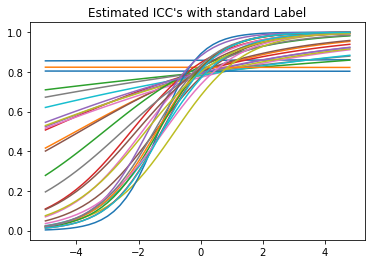

In [319]:
#ICC's for EM-Result with standard Label
a_hat= model.a_hat
b_hat = model.b_hat

plot_iccs(a_hat, b_hat, range=[-5, 5], title="Estimated ICC's with standard Label")

### Predict Answers

#### Train

In [322]:
pred_train = np.squeeze(model.predict_answers(U))
p_train = model.predict_answers(U, return_p=True)

In [323]:
model.get_training_performance(U, late_U)

Accuracy per Question: 
[0.80357143 0.79642857 0.83571429 0.76428571 0.75       0.75
 0.74285714 0.75714286 0.78214286 0.68571429 0.76428571 0.81785714
 0.73928571 0.74285714 0.80714286 0.75714286 0.71071429 0.75
 0.79285714 0.78571429] 
Overall acuracy: 0.7667857142857143
AUC-Score: 0.7541655652984172


## Add more Features

In [261]:
#Setting up a ProgSnap2 Dataset (this is the data format used in the Challenge.)
train_ps2 = ProgSnap2Dataset(os.path.join(TRAIN_PATH, 'Data')) 

In [262]:
#Extracted from code_feature_model.ipynb
def get_code_table(ps2_dataset):
    events_table = ps2_dataset.get_main_table()
    code_states = ps2_dataset.get_code_states_table()
    runs = events_table.merge(code_states, on=PS2.CodeStateID)
    runs = runs[runs[PS2.EventType] == 'Run.Program']
    runs = runs[[PS2.Order, PS2.SubjectID, PS2.ProblemID, 'Code']]
    return runs

In [263]:
code_table_train = get_code_table(train_ps2)

# Some empty strings got imported as "NaN", so we turn them back
code_table_train['Code'][code_table_train['Code'].apply(lambda x: not isinstance(x, str))] = ""
code_table_train

,Order,SubjectID,ProblemID,Code
0,179362,014604ba54339d4b1266cf78e125053a5ac11dd861ef3c...,1,"public int sortaSum(int a, int b)\r\n{\r\n ..."
2,179364,014604ba54339d4b1266cf78e125053a5ac11dd861ef3c...,3,"public boolean in1To10(int n, boolean outsideM..."
4,179358,014604ba54339d4b1266cf78e125053a5ac11dd861ef3c...,5,"public boolean answerCell(boolean isMorning, b..."
6,179366,014604ba54339d4b1266cf78e125053a5ac11dd861ef3c...,12,"public boolean squirrelPlay(int temp, boolean ..."
8,179331,014604ba54339d4b1266cf78e125053a5ac11dd861ef3c...,13,"public int caughtSpeeding(int speed, boolean i..."
...,...,...,...,...
262387,458819,ffc3b91c3744d275e99f49e105f016732d694a76314d8c...,71,public boolean canBalance(int[] nums)\r\n{\r\n...
262389,458821,ffc3b91c3744d275e99f49e105f016732d694a76314d8c...,112,public int[] seriesUp(int n)\r\n{\r\n int[]...
262392,458824,ffc3b91c3744d275e99f49e105f016732d694a76314d8c...,112,public int[] seriesUp(int n)\r\n{\r\n int[]...
262394,458826,ffc3b91c3744d275e99f49e105f016732d694a76314d8c...,118,public int[] shiftLeft(int[] nums)\r\n{\r\n ...


In [264]:
code_table_test = get_code_table(test_ps2)

# Some empty strings got imported as "NaN", so we turn them bcak
code_table_test['Code'][code_table_test['Code'].apply(lambda x: not isinstance(x, str))] = ""

In [265]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Note this approach is _very_ naive, since it's using NLP assumptions
# about tokenizing, among other things, but it is good enough for a demonstration.
code_vectorizer = TfidfVectorizer(max_features=100)
code_vectorizer.fit(code_table_train['Code'])
top_vocab = code_vectorizer.vocabulary_
top_vocab

def create_encoder_dict(code_df):
    code_problem_encoders = {}
    problem_ids = code_df["ProblemID"].unique()
    for problem_id in problem_ids:
        code = code_df['Code'][code_df["ProblemID"] == problem_id]
        #problem_id = rows[PS2.ProblemID].iloc[0]
        code_vectorizer = TfidfVectorizer(vocabulary=top_vocab)
        code_vectorizer.fit(code)
        code_problem_encoders[problem_id] = code_vectorizer
    return(code_problem_encoders)
        
encoder_dict = create_encoder_dict(code_df=code_table_train)


In [266]:
def create_embeddings(code_df, encoder_dict):
    problem_ids = code_df["ProblemID"].unique()
    #Create Embedding_Dataset
    for i, problem_id in enumerate(problem_ids):
        vectorizer = encoder_dict[problem_id]
        code_part = code_df[["SubjectID", "Code"]][code_df["ProblemID"] == problem_id]
        embedding = vectorizer.transform(code_part["Code"]).todense()
        index = pd.MultiIndex.from_arrays([code_part["SubjectID"], pd.Series([problem_id for i in code_part.index])], names=('SubjectID', 'ProblemID'))
        if i == 0:
            embedding_df = pd.DataFrame(embedding, index=index)
        else:
            embedding_df = pd.concat((embedding_df, pd.DataFrame(embedding, index=index)), axis=0)
    #Reshape Embeddings Dataset
    #Generate a complete Index for all Problems and Subjects
    all_problems = pd.DataFrame(code_df.ProblemID.unique(), columns=["ProblemID"])
    all_problems["key"] = 1
    all_subjects = pd.DataFrame(code_df.SubjectID.unique(), columns=["SubjectID"])
    all_subjects["key"] = 1
    complete_index = pd.merge(all_subjects,all_problems,on="key").drop("key", 1)
    complete_index.columns = ["SubjectID", "ProblemID"]
    
    #Average over Problems that were attempted multiple times by the same subject
    mean_problem_idf = pd.DataFrame(embedding_df).groupby(embedding_df.index).mean()
    mean_problem_idf = mean_problem_idf.reindex(complete_index).to_numpy().reshape(len(all_subjects),100*len(all_problems))
    mean_problem_idf = pd.DataFrame(mean_problem_idf, index = all_subjects["SubjectID"])
    mean_problem_idf

    return(mean_problem_idf)

In [324]:
code_embeddings = create_embeddings(code_table_train, encoder_dict)
test_code_embeddings = create_embeddings(code_table_test, encoder_dict)
code_embeddings

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
SubjectID,,,,,,,,,,,,,,,,,,,,,
014604ba54339d4b1266cf78e125053a5ac11dd861ef3cc0b4ed777ed0e2af0a,0.0,0.100614,0.0,0.0,0.105679,0.097386,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01e96e066eff2e82627dac0493737be2de9bd2f50d6d498bb6420906c7164c05,0.0,0.206504,0.0,0.0,0.216898,0.199877,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03000c72d4dd6a4be44ffc175dec5d9a15a83a2f8073b08b27be1fb7638cc466,0.0,0.238854,0.0,0.0,0.250877,0.231190,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0461c96c9cc0058f709704605f24136f373ba4e9ac083a1157d0976f1b6e8419,0.0,0.189563,0.0,0.0,0.099552,0.091740,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
048fce7bd5670d2ce6215f41856aea059973fb280ce1067c7896d7e982dce89a,0.0,0.186531,0.0,0.0,0.195920,0.180545,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fe545219144abfb405c64d3fed4f32dc348ece7afb0a814e646ef2f17e69bc7d,0.0,0.238854,0.0,0.0,0.250877,0.231190,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ff02364c8aab08a51916bd6a58bf7337b5d60939ee9b5381cce52e3ccbcd6b6d,0.0,0.240433,0.0,0.0,0.200702,0.232717,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ff4cfd98fc176f36fa99b2bc839990d2fd13de4e59b5c4aed8f3ccb1962d249f,0.0,0.000000,0.0,0.0,0.000000,0.072245,0.0,0.0,0.0,0.0,...,0.0,0.0,0.76311,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model with additional Neural Network in order to use more covariates

In [269]:
from sklearn.preprocessing import normalize

pred_index = late_U.index

U_split = U.reindex(late_U.index).fillna(U.mean()).to_numpy()
subject_df_split = normalize(subject_df.set_index(subject_df["SubjectID"]).reindex(pred_index).drop("SubjectID", axis=1).drop("PercAltLabelTrue", axis=1).astype("float32").to_numpy())
code_embeddings_split = normalize(code_embeddings.reindex(pred_index).fillna(code_embeddings.mean()).to_numpy())
alpha_split = pd.DataFrame(model.alpha).set_index(U.index).reindex(pred_index).fillna(np.nanmean(model.alpha))
late_U_split = late_U.to_numpy()
s_split = pd.DataFrame(model.s_hat).set_index(late_U.index).reindex(pred_index)

In [270]:
from sklearn.model_selection import train_test_split


index_train, index_val, U_train, U_val, subject_df_train, subject_df_val, code_embeddings_train, code_embeddings_val, alpha_train, alpha_val, late_U_train, late_U_val, s_train, s_val = \
train_test_split(pred_index,
                  U_split,
                  subject_df_split,
                  code_embeddings_split,
                  alpha_split,
                  late_U_split,
                  s_split
                  )

In [271]:
import tensorflow as tf

pred_index = late_U.index

#Input
tf_U = tf.constant(U.reindex(late_U.index).fillna(U.mean()).to_numpy())
tf_subject_data = tf.constant(subject_df.set_index(subject_df["SubjectID"]).reindex(pred_index).drop("SubjectID", axis=1).drop("PercAltLabelTrue", axis=1).astype("float32").to_numpy())
tf_code_embeddings = tf.constant(code_embeddings.reindex(pred_index).fillna(code_embeddings.mean()).to_numpy())

#Item Parameters
tf_beta = tf.cast(tf.constant(model.beta_hat), dtype="float32")
tf_gamma = tf.cast(tf.constant(model.gamma_hat), dtype="float32")

#Person Parameters
tf_alpha = tf.constant(pd.DataFrame(model.alpha).set_index(U.index).reindex(pred_index).fillna(np.nanmean(model.alpha)))

#Label
tf_late_U = tf.constant(late_U.to_numpy())
tf_s = tf.constant(pd.DataFrame(model.s_hat).set_index(late_U.index).reindex(pred_index))

In [272]:
######################
#Validation Constants
#Input
tf_U_val = tf.constant(U_val)
tf_subject_data_val = tf.constant(subject_df_val)
tf_code_embeddings_val = tf.constant(code_embeddings_val)

#Item Parameters
tf_beta = tf.cast(tf.constant(model.beta_hat), dtype="float32")
tf_gamma = tf.cast(tf.constant(model.gamma_hat), dtype="float32")

#Person Parameters
tf_alpha_val = tf.constant(alpha_val)

#Label
tf_late_U_val = tf.constant(late_U_val)
tf_s_val = tf.constant(s_val)

#########################################
#Train Constants
#Input
tf_U_train = tf.constant(U_train)
tf_subject_data_train = tf.constant(subject_df_train)
tf_code_embeddings_train = tf.constant(code_embeddings_train)

#Item Parameters
tf_beta = tf.cast(tf.constant(model.beta_hat), dtype="float32")
tf_gamma = tf.cast(tf.constant(model.gamma_hat), dtype="float32")

#Person Parameters
tf_alpha_train = tf.constant(alpha_train)

#Label
tf_late_U_train = tf.constant(late_U_train)
tf_s_train = tf.constant(s_train)

In [274]:
#Create Tensorflow Datasets
full_train_dataset = tf.data.Dataset.from_tensor_slices(((tf_alpha, tf_U, tf_subject_data, tf_code_embeddings), (tf_s, tf_late_U)))
train_dataset = tf.data.Dataset.from_tensor_slices(((tf_alpha_train, tf_U_train, tf_subject_data_train, tf_code_embeddings_train), (tf_s_train, tf_late_U_train)))

BATCH_SIZE = 16
SHUFFLE_BUFFER_SIZE = 10

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).repeat(40)

full_train_dataset = full_train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).repeat(40)


In [276]:
def late_answer_model(alpha, U, subject_df, code_embeddings):
    dropout = 0.3

    #Individual hidden Layers
    h_U = tf.keras.layers.Dropout(dropout)(U)
    h_U = tf.keras.layers.Dense(16, activation="relu")(h_U)
    h_U = tf.keras.layers.BatchNormalization()(h_U)

    h_subject_df = tf.keras.layers.Dropout(dropout)(subject_df)
    h_subject_df = tf.keras.layers.Dense(16, activation="relu")(h_subject_df)
    h_subject_df = tf.keras.layers.BatchNormalization()(h_subject_df)

    h_code_embeddings = tf.keras.layers.Dropout(dropout)(code_embeddings)
    h_code_embeddings = tf.keras.layers.Dense(16, activation="relu")(h_code_embeddings)
    h_code_embeddings = tf.keras.layers.BatchNormalization()(h_code_embeddings)

    #conbining hidden Layers
    h_combined = tf.keras.layers.Concatenate()([h_U, h_subject_df, h_code_embeddings])
    h_combined = tf.keras.layers.Dropout(dropout)(h_combined)
    h_combined = tf.keras.layers.BatchNormalization()(h_combined)

    #Predicting outcome
    h_combined = tf.keras.layers.Dense(32, activation="relu")(h_combined)
    s = tf.keras.layers.Dense(1)(h_combined)

    #Late ICC with everything fixed 
    late_answer_probs = tf.sigmoid(tf.add(alpha, tf_beta) + tf.multiply(tf_gamma,s))

    return(late_answer_probs, s)

In [304]:
input_alpha = tf.keras.Input(shape=1)
input_U = tf.keras.Input(shape=tf_U.shape[1])
input_sd = tf.keras.Input(shape=tf_subject_data.shape[1])
input_ce = tf.keras.Input(shape=tf_code_embeddings.shape[1])
net = late_answer_model(input_alpha, input_U, input_sd, input_ce)


z_pred_model = tf.keras.Model(inputs=[input_alpha, input_U, input_sd, input_ce], outputs=net)
optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.BinaryCrossentropy(from_logits=False) #tf.keras.losses.MSE

z_pred_model.summary()

Model: "model_27"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_107 (InputLayer)          [(None, 30)]         0                                            
__________________________________________________________________________________________________
input_108 (InputLayer)          [(None, 6)]          0                                            
__________________________________________________________________________________________________
input_109 (InputLayer)          [(None, 5000)]       0                                            
__________________________________________________________________________________________________
dropout_20 (Dropout)            (None, 30)           0           input_107[0][0]                  
___________________________________________________________________________________________

In [279]:
#Training Algorithm
def train(model, train_dataset, loss):
    for step, batch in enumerate(train_dataset):

        #Using correct Datatypes for dataset api
        input_alpha, input_U, input_sd, input_ce = batch[0]
        #x_batch= tf.cast(batch[0], dtype=tf.float32)
        s_label, late_answers_label= batch[1]#tf.cast(batch[1], dtype=tf.int32)

        with tf.GradientTape(persistent=True) as tape:
            #Propagate Network
            pred_answers, pred_s = model([input_alpha, input_U, input_sd, input_ce])
            #Calculating Loss
            vars   = model.trainable_variables 
            lossL2 = tf.add_n([ tf.nn.l2_loss(v) for v in vars ]) * 0.001
            xent = loss(late_answers_label, pred_answers) + 0.1*tf.keras.losses.MSE(s_label, pred_s) + lossL2

        #Calculating gradients with respect to loss
        variables = model.trainable_variables
        grads = tape.gradient(xent, variables)

        #Optimizing in one line
        optimizer.apply_gradients(zip(grads, variables))
        del tape

        if not step % 10:
            print("Loss: {} ".format(tf.reduce_mean(xent)))

In [280]:
train(z_pred_model, train_dataset, loss)

Loss: 2.3661141395568848 
Loss: 1.7289212942123413 
Loss: 1.2390174865722656 
Loss: 0.7484357357025146 
Loss: 0.7505332231521606 
Loss: 0.608022153377533 
Loss: 0.7192257642745972 
Loss: 0.7902839779853821 
Loss: 0.582821249961853 
Loss: 0.7177512049674988 
Loss: 0.8070451021194458 
Loss: 0.6366996765136719 
Loss: 0.6279028654098511 
Loss: 0.821135938167572 
Loss: 0.6324552297592163 
Loss: 0.6897746324539185 
Loss: 0.812928318977356 
Loss: 0.5347728133201599 
Loss: 0.6782684326171875 
Loss: 0.804852306842804 
Loss: 0.6731356382369995 
Loss: 0.6689290404319763 
Loss: 0.6545489430427551 
Loss: 0.5187669992446899 
Loss: 0.5940464735031128 
Loss: 0.7372093796730042 
Loss: 0.7082549333572388 
Loss: 0.6231944561004639 
Loss: 0.6032096147537231 
Loss: 0.677898108959198 
Loss: 0.6176837682723999 
Loss: 0.6802528500556946 
Loss: 0.5829193592071533 
Loss: 0.6441872119903564 
Loss: 0.6269910335540771 
Loss: 0.47750768065452576 
Loss: 0.5955027341842651 
Loss: 0.6446805000305176 
Loss: 0.551573038

In [281]:
answer_pred_train, s_pred_train = z_pred_model.predict([tf_alpha_train, tf_U_train, tf_subject_data_train, tf_code_embeddings_train])
s_pred_train = pd.DataFrame(s_pred_train).set_index(index_train)

Accuracy per Question: 
[0.8034188  0.77777778 0.80769231 0.83333333 0.73076923 0.72222222
 0.71794872 0.7991453  0.84615385 0.72222222 0.78205128 0.85470085
 0.8034188  0.75641026 0.81623932 0.78632479 0.81196581 0.75641026
 0.85042735 0.81196581] 
Overall acuracy: 0.7895299145299145
AUC-Score: 0.7108612787333154


In [330]:
answer_pred_val, s_pred_val = z_pred_model.predict([tf_alpha_val, tf_U_val, tf_subject_data_val, tf_code_embeddings_val])
s_pred_val = pd.DataFrame(s_pred_val).set_index(index_val)

print("\nPerformance of Training Model:")
#Model with neural Network
model.get_training_performance(pd.DataFrame(U_train, columns=U.columns), pd.DataFrame(late_U_train, columns=late_U.columns), s_pred_train.to_numpy().transpose()[0])

print("\nPerformance of Valiation Model:")
#Validation Model
model.get_training_performance(pd.DataFrame(U_val, columns=U.columns), pd.DataFrame(late_U_val, columns=late_U.columns), s_pred_val.to_numpy().transpose()[0])
#0.7525

print("\nPerformance of Model with mean S")
#Model with naive s (Mean)
model.get_training_performance(U, late_U)

print("\nPerformance of Model with estimated Practise amount:")
#Model with real s_hat values
s_hat_reindex = pd.DataFrame(model.s_hat).set_index(late_U.index).reindex(U.index)
model.get_training_performance(U, late_U, s_hat_reindex.to_numpy().transpose()[0])


Performance of Training Model:
Accuracy per Question: 
[0.8034188  0.76923077 0.81196581 0.82905983 0.73931624 0.71367521
 0.70940171 0.79059829 0.82478632 0.70940171 0.78632479 0.85897436
 0.78632479 0.76495726 0.81196581 0.7991453  0.80769231 0.76923077
 0.85897436 0.8034188 ] 
Overall acuracy: 0.7873931623931624
AUC-Score: 0.8080152067552973

Performance of Valiation Model:
Accuracy per Question: 
[0.78481013 0.70886076 0.75949367 0.48101266 0.64556962 0.6835443
 0.58227848 0.59493671 0.70886076 0.53164557 0.60759494 0.49367089
 0.49367089 0.60759494 0.56962025 0.3164557  0.30379747 0.51898734
 0.46835443 0.49367089] 
Overall acuracy: 0.5677215189873417
AUC-Score: 0.719936247723133

Performance of Model with mean S
Accuracy per Question: 
[0.80357143 0.79642857 0.83571429 0.76428571 0.75       0.75
 0.74285714 0.75714286 0.78214286 0.68571429 0.76428571 0.81785714
 0.73928571 0.74285714 0.80714286 0.75714286 0.71071429 0.75
 0.79285714 0.78571429] 
Overall acuracy: 0.76678571428571

## Predict on Test Data

In [289]:
train(z_pred_model, full_train_dataset, loss)

Loss: 10.477397918701172 
Loss: 1.5951216220855713 
Loss: 0.855908989906311 
Loss: 0.7247612476348877 
Loss: 0.5903290510177612 
Loss: 0.520134687423706 
Loss: 0.6091681718826294 
Loss: 0.6914040446281433 
Loss: 0.5403099060058594 
Loss: 0.5765261054039001 
Loss: 0.6050443053245544 
Loss: 0.5293889045715332 
Loss: 0.5376723408699036 
Loss: 0.5559159517288208 
Loss: 0.5384564995765686 
Loss: 0.4731486737728119 
Loss: 0.5081988573074341 
Loss: 0.526674747467041 
Loss: 0.6192723512649536 
Loss: 0.4278545081615448 
Loss: 0.5276734828948975 
Loss: 0.5018715858459473 
Loss: 0.6733265519142151 
Loss: 0.5508716702461243 
Loss: 0.6380671262741089 
Loss: 0.5408432483673096 
Loss: 0.5492761135101318 
Loss: 0.5410609245300293 
Loss: 0.585856556892395 
Loss: 0.44128572940826416 
Loss: 0.5771195292472839 
Loss: 0.47511231899261475 
Loss: 0.5981924533843994 
Loss: 0.5174794793128967 
Loss: 0.5825371742248535 
Loss: 0.48896822333335876 
Loss: 0.5532721281051636 
Loss: 0.5245705842971802 
Loss: 0.57146

In [290]:
test_alpha = model.predict_early_ability(test_U)

In [291]:
test_pred_index = test_U.index

#Input
tf_test_U = tf.constant(test_U.fillna(U.mean()).to_numpy())
tf_test_subject_data = tf.constant(normalize(test_subject_df.set_index(test_subject_df["SubjectID"]).reindex(test_pred_index).drop("SubjectID", axis=1).astype("float32").to_numpy()))
tf_test_code_embeddings = tf.constant(normalize(test_code_embeddings.reindex(test_pred_index).fillna(test_code_embeddings.mean()).to_numpy()))

#Person Parameters
tf_test_alpha = tf.cast(tf.constant(pd.DataFrame(test_alpha).set_index(test_pred_index).fillna(np.nanmean(test_alpha))), dtype="float32")


In [292]:
s_test_pred = late_answer_model(alpha=tf_test_alpha, U=tf_test_U, subject_df=tf_test_subject_data, code_embeddings=tf_test_code_embeddings)[1].numpy()
p_test = model.predict_answers(test_U, s_test_pred.flatten(), return_p=True).to_numpy()

late_test["Label"] = np.delete(p_test.reshape((np.prod(p_test.shape),1)), miss_indices_late)
late_test

,SubjectID,AssignmentID,ProblemID,Label
0,00358c94503a8d9e6869efc6e5cdb0e1c8e9eb39b1fd46...,494,41,0.870564
1,00358c94503a8d9e6869efc6e5cdb0e1c8e9eb39b1fd46...,494,43,0.552190
2,00358c94503a8d9e6869efc6e5cdb0e1c8e9eb39b1fd46...,494,44,0.751176
3,00358c94503a8d9e6869efc6e5cdb0e1c8e9eb39b1fd46...,494,46,0.294997
4,00358c94503a8d9e6869efc6e5cdb0e1c8e9eb39b1fd46...,494,49,0.447845
...,...,...,...,...
2360,fa7805c1d46ef49851de43750a665a993eef750b560159...,502,64,0.008486
2361,fa7805c1d46ef49851de43750a665a993eef750b560159...,502,70,0.005495
2362,fa7805c1d46ef49851de43750a665a993eef750b560159...,502,71,0.023280
2363,fa7805c1d46ef49851de43750a665a993eef750b560159...,502,112,0.013635


In [293]:
late_test[["SubjectID", "AssignmentID", "ProblemID", "Label"]].to_csv("C:/Users/Jesper/Google Drive/Uni docs/Statistik/Masterarbeit/Daten/submissions/predictions.csv", header=True)